In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [18.0, 16.0]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

## Odczyt danych

In [ ]:
import pandas as pd
import numpy as np


filenames = \
    ["AA_00_W_N_P000_01.txt", "pomiar referencyjny fragmentu ścianki bez wad (grubość nominalna 10 mm)"], \
    ["AA_06_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 1,5 mm (15 % grubości nominalnej), z dnem nieregularnym"], \
    ["AA_07_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 3,0 mm (30 % grubości nominalnej), z dnem płaskim"], \
    ["AA_08_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 4,6 mm (46 % grubości nominalnej), z dnem nieregularnym"], \
    ["AA_09_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 5,0 mm (50 % grubości nominalnej), z dnem płaskim"], \
    ["AA_09_Z_C_P000_01.txt", "pomiar ubytku zewnętrznego o głębokości 5,0 mm (50 % grubości nominalnej), z dnem płaskim"], \
    ["AA_10_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 5,0 mm (50 % grubości nominalnej), z dnem nieregularnym"]
      
data = []
for filename, desc in filenames:
    data.append([])
    data [-1] = pd.read_csv(filename, header=[0], sep="\t", skiprows = [1, 2])

## Próbkowanie 500MHz

### Dane i obiednie z uśrednienia modułu

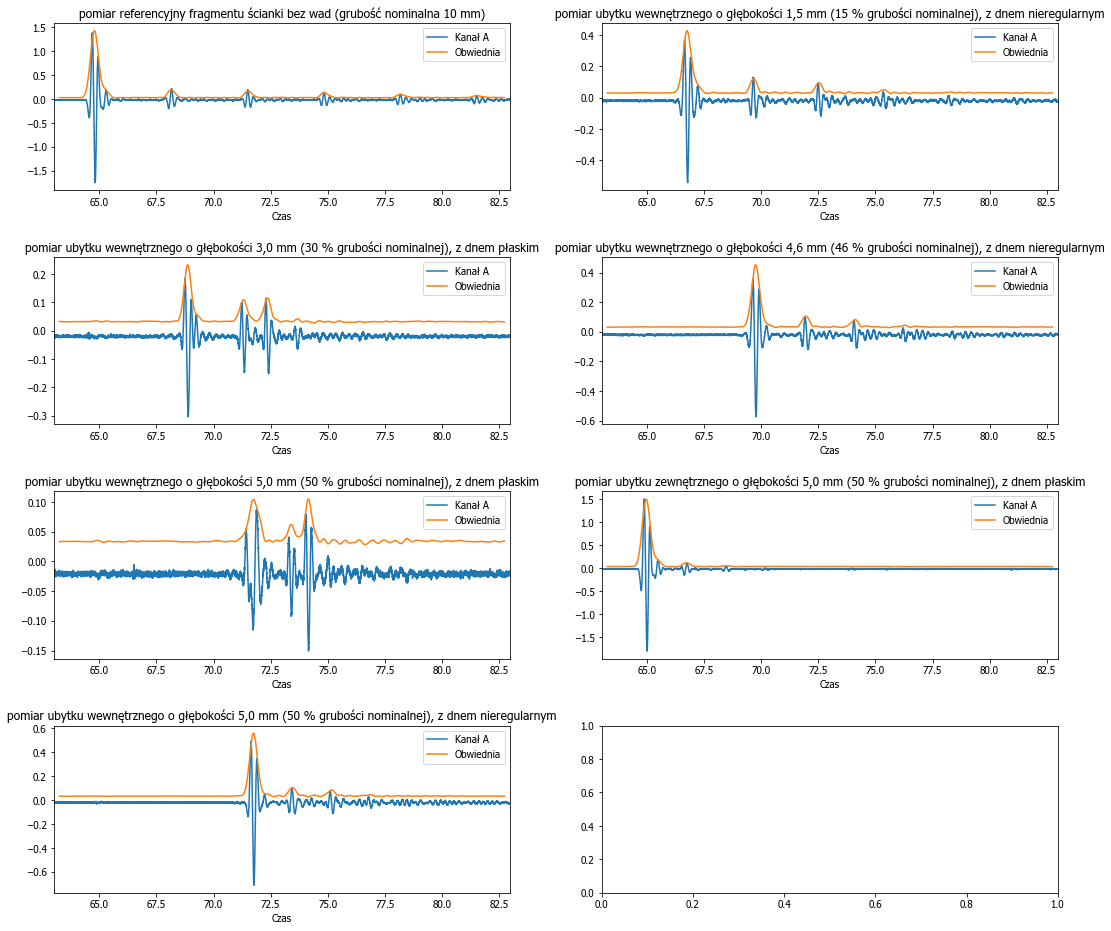

In [4]:
fig1, axs = plt.subplots(4, 2)
plt.subplots_adjust(hspace = 0.4)
axs = [*axs[0], *axs[1], *axs[2], *axs[3]]

for df,[filename,desc],ax in zip(data, filenames, axs):
    df["Obwiednia"] = df["Kanał A"].abs().rolling(window=256, win_type ='hamming', center=True).mean()*(np.pi/2)
    df.plot(x="Czas", y="Kanał A", ax=ax, title=desc)
    df.plot(x="Czas", y="Obwiednia", ax=ax)
plt.show()

In [5]:
data[0][300:500]

,Czas,Kanał A,Obwiednia
300,63.596005,-0.019044,0.028432
301,63.598005,-0.019044,0.028435
302,63.600005,-0.017701,0.028440
303,63.602005,-0.017701,0.028445
304,63.604005,-0.017701,0.028445
...,...,...,...
495,63.986005,-0.020447,0.028825
496,63.988005,-0.020447,0.028825
497,63.990005,-0.016358,0.028822
498,63.992005,-0.017701,0.028820


### Szukanie maksimum (trywialne)

In [6]:
def find_max(x):
    return x[len(x)//2] == np.max(x)

df = data[0]

df['Maks'] = df["Obwiednia"].rolling(window=1024, center=True).apply(find_max, raw=True)
df[df['Maks']==1]


,Czas,Kanał A,Obwiednia,Maks
893,64.782005,-1.246864,1.431773,1.0
2574,68.144005,0.193060,0.191087,1.0
4258,71.512005,0.180792,0.169701,1.0
5021,73.038005,-0.051698,0.036013,1.0
5928,74.852005,0.133244,0.130435,1.0
7596,78.188005,0.095157,0.098593,1.0
9265,81.526004,0.063845,0.075179,1.0


## Próbkowanie 50MHz

In [7]:
data2 = data[0][::10]

In [8]:
data2 = []
for tmp in data:
    data2.append(tmp[::10].copy())

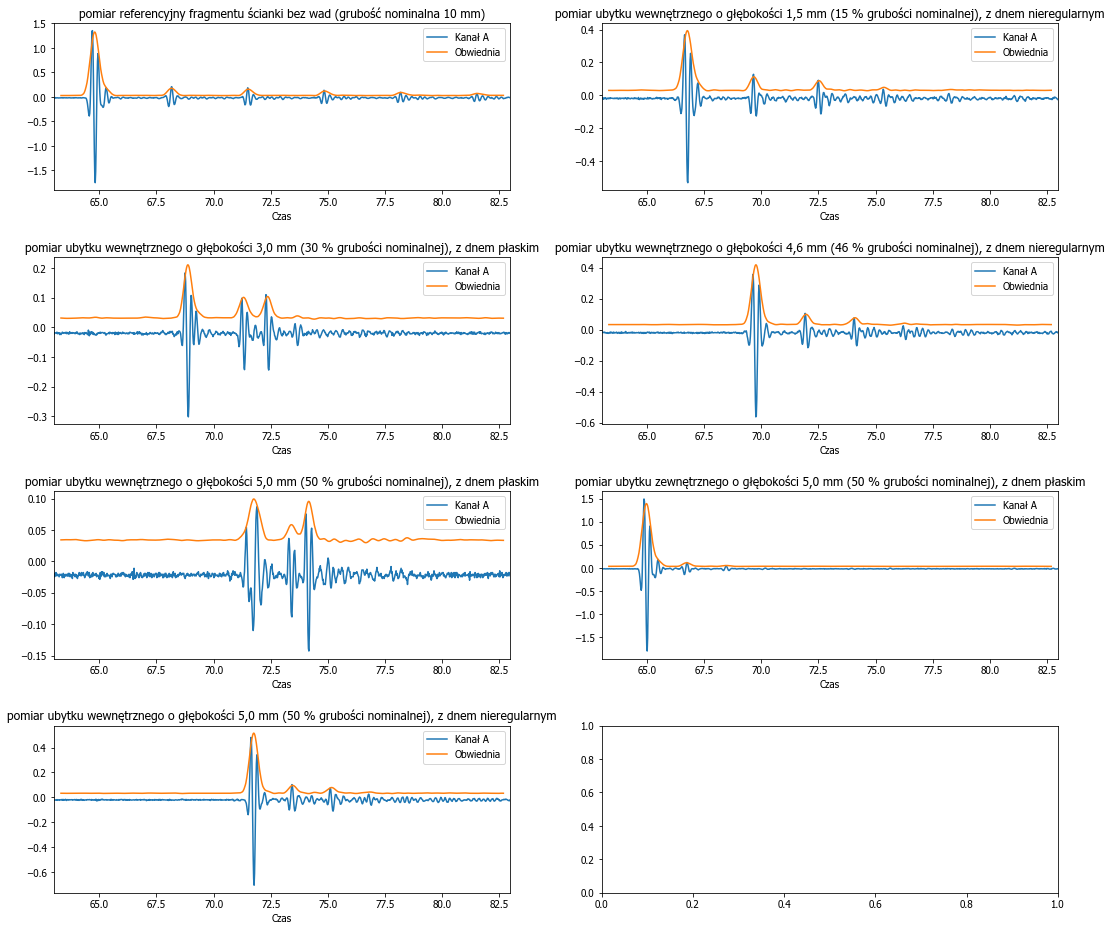

In [9]:
fig1, axs = plt.subplots(4, 2)
plt.subplots_adjust(hspace = 0.4)
axs = [*axs[0], *axs[1], *axs[2], *axs[3]]

for df,[filename,desc],ax in zip(data2, filenames, axs):
    df["Obwiednia"] = df["Kanał A"].abs().rolling(window=32, win_type ='hamming', center=True).mean()*(np.pi/2)
    df.plot(x="Czas", y="Kanał A", ax=ax, title=desc)
    df.plot(x="Czas", y="Obwiednia", ax=ax)
plt.show()

In [13]:
def find_max(x):
    return x[len(x)//2] == np.max(x)

df = data2[0]

df['Maks'] = df["Obwiednia"].rolling(window=128, center=True).apply(find_max, raw=True)
df[df['Maks']==1]

,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-1.580004,1.324548,1.0
2580,68.156005,0.209357,0.177376,1.0
4260,71.516005,0.175359,0.158671,1.0
5930,74.856005,0.130497,0.120839,1.0
7600,78.196005,0.093814,0.091753,1.0
